##Steps:
1. Import libraries
2. Import the dataset
3. Perform Data Analysis & EDA
4. Spliting the data
5. [Optional] Data Preprocessing - Feature Scaling,...
6. Choosing a model - Decision Tree Regressor
7. Training the model
8. Testing the model
9. Checking the performance of the model

##Importing the Libraries


In [ ]:
#Mathematical operations
import numpy as np
#Dta Manipulation
import pandas as pd
#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#Data Cleaning
import re
#Splitting the Dataset
from sklearn.model_selection import train_test_split
#Choosing the Model
from sklearn.tree import DecisionTreeRegressor
#Data preprocessing
from sklearn.preprocessing import standardscaler
#Metrics for calculating the Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ImportError: cannot import name 'standardscaler' from 'sklearn.preprocessing' (/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/__init__.py)

##Importing the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

## Data Analysis and EDA

In [ ]:
#Showing first 5 rows of Dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#Showing Last 5 rows of Dataset
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
#Showing the dimension of dataset
df.ndim

2

In [ ]:
#Showing the shape of Dataset
df.shape

(4340, 8)

In [ ]:
#Giving information of all the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#Describing the Statistical information of columns with numerical values
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
#Showing all the columnsin Dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
#Giving all the unique values in the  column seller_tyoe
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
#Giving all the unique values in the  column transmission
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
#Giving all the unique values in the  column owner
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
#Giving all the unique values in the  column fuel
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
newdf=df.copy()


In [ ]:
# Create a column new_seller_type and place it at index of the seller_type column
# Replace the values:
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2
x=newdf.seller_type.replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})
newdf.insert(newdf.columns.get_loc("seller_type"),'new_seller_type',x)

In [ ]:
# Creating a column new_fuel and placing it at index of the fuel column
# Replace the values:
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4
y=newdf.fuel.replace({'Petrol':0,'Diesel':2,'CNG':3,'LPG':4,'Electric':5})
newdf.insert(newdf.columns.get_loc('fuel'),'new_fuel',y)

In [ ]:
#As new_fuel is now the column which is indicating fuel types so we are gone drop column fuel
newdf.drop(columns='fuel',axis=1,inplace=True)

In [ ]:
#As new_seller_type is showing the types of seller so we are gone drop the column seller_type
newdf.drop(columns='seller_type',axis=1,inplace=True)

In [ ]:
# Creating a column new_transmission and placing it at the index of transmission
#Relace the values:
#Manual:1
#Automatic:2
a=newdf.transmission.replace({'Manual':1,'Automatic':2})
newdf.insert(newdf.columns.get_loc('transmission'),'new_transmission',a)

In [ ]:
#As new_transmission is now the column which is indicating types of transmission so we are gone drop column transmission

newdf.drop(columns='transmission',axis=1,inplace=True)

In [ ]:
# Creating a column new_owner_column and placing it at the index of transmission
#First Owner:1
#Second Owner:2
#Fourth & Above Owner:4'
#Third Owner:3
#Test Drive Car:5
b=newdf.owner.replace({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})
newdf.insert(newdf.columns.get_loc('owner'),'new_owner_column',b)

In [ ]:
#As new_owner_column is now the column for indicating the types of owner so we are gone drop the column owner
newdf.drop(columns='owner',axis=1,inplace=True)

In [ ]:
#Adding a new column no_of_years as it will help us to analyse that what is the age of the car
newdf['Current_year']=2024
newdf['no_of_years']=newdf['Current_year']-newdf['year']

In [ ]:

#Dropping the column Current_year
newdf.drop(columns='Current_year',axis=1,inplace=True)

In [ ]:
#Dropping the column name and year and renaming the column selling _price to current_selling_price
newdf.drop(['name','year'],axis=1,inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [ ]:
#New Dataset
newdf.head()

,selling_price,km_driven,new_fuel,new_seller_type,new_transmission,new_owner_column,no_of_years
0,60000,70000,0,1,1,1,17
1,135000,50000,0,1,1,1,17
2,600000,100000,2,1,1,1,12
3,250000,46000,0,1,1,1,7
4,450000,141000,2,1,1,2,10


In [ ]:
#Showing all the information about newdf
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   selling_price     4340 non-null   int64
 1   km_driven         4340 non-null   int64
 2   new_fuel          4340 non-null   int64
 3   new_seller_type   4340 non-null   int64
 4   new_transmission  4340 non-null   int64
 5   new_owner_column  4340 non-null   int64
 6   no_of_years       4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [ ]:
#Showing Correlation
newdf.corr()

,selling_price,km_driven,new_fuel,new_seller_type,new_transmission,new_owner_column,no_of_years
selling_price,1.000000,-0.192289,0.250550,0.240666,0.530205,-0.198833,-0.413922
km_driven,-0.192289,1.000000,0.286437,-0.187131,-0.120226,0.274409,0.419688
new_fuel,0.250550,0.286437,1.000000,0.016793,0.033731,0.009505,-0.103468
new_seller_type,0.240666,-0.187131,0.016793,1.000000,0.200191,-0.211115,-0.182458
new_transmission,0.530205,-0.120226,0.033731,0.200191,1.000000,-0.083924,-0.143800
new_owner_column,-0.198833,0.274409,0.009505,-0.211115,-0.083924,1.000000,0.410448
no_of_years,-0.413922,0.419688,-0.103468,-0.182458,-0.143800,0.410448,1.000000


<Axes: >

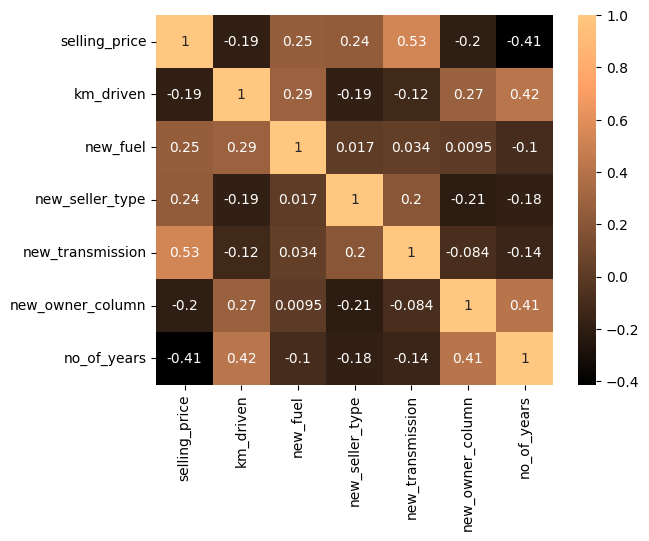

In [ ]:
#Visual Representation for correlation with help of Heatmap
sns.heatmap(newdf.corr(),annot=True,cmap='copper')

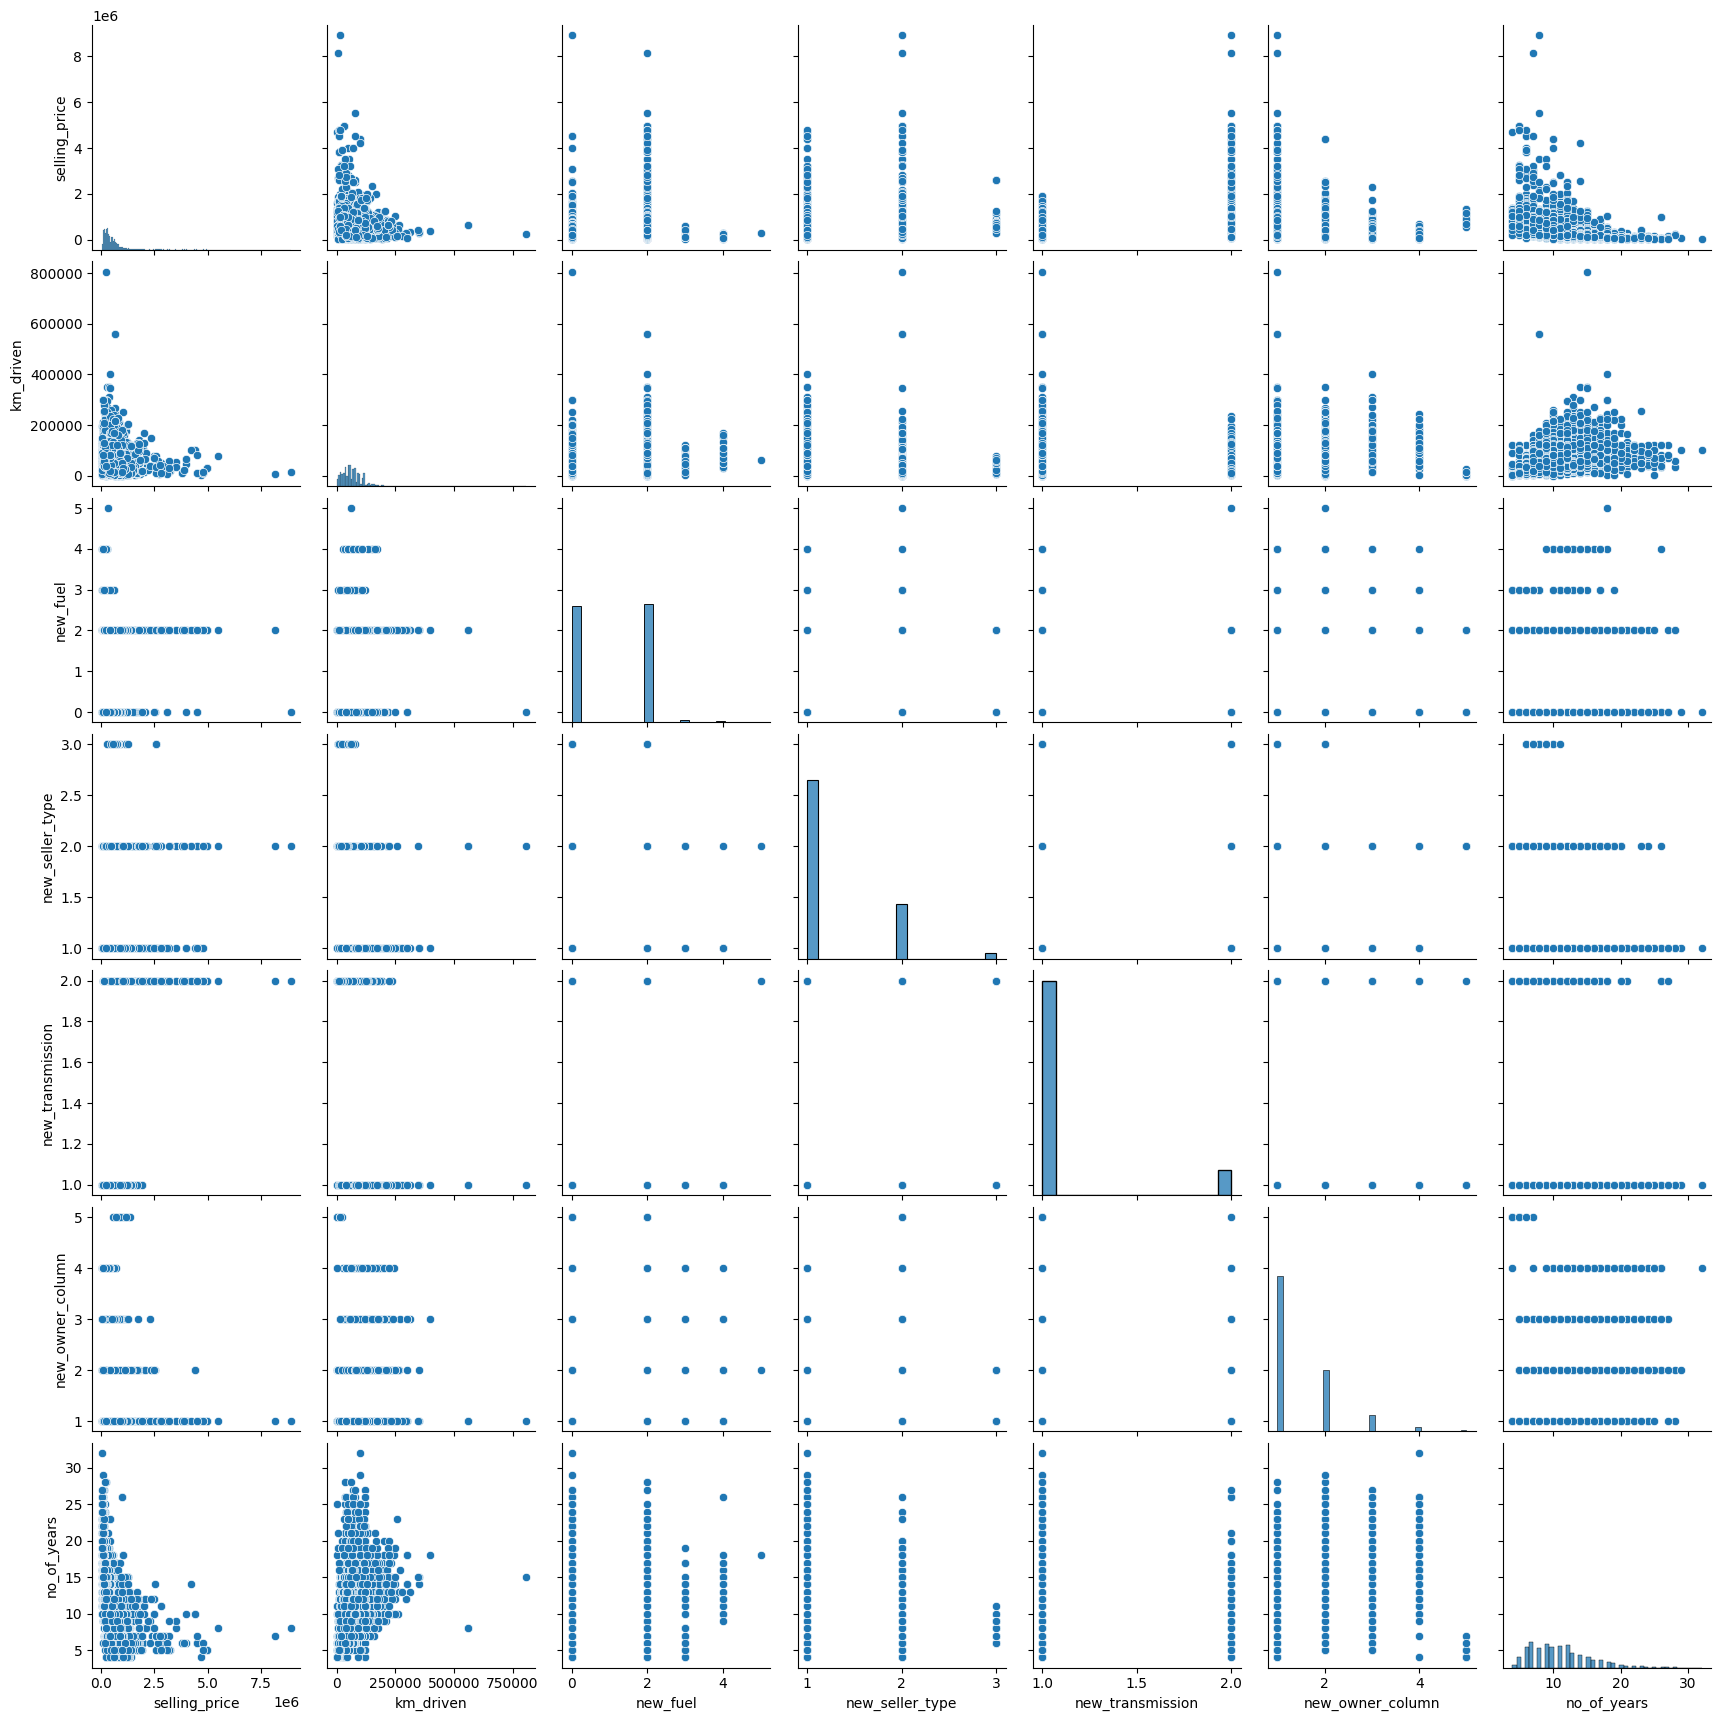

In [ ]:
#Showing the Scatterplot for every column
sns.pairplot(newdf)

<Axes: >

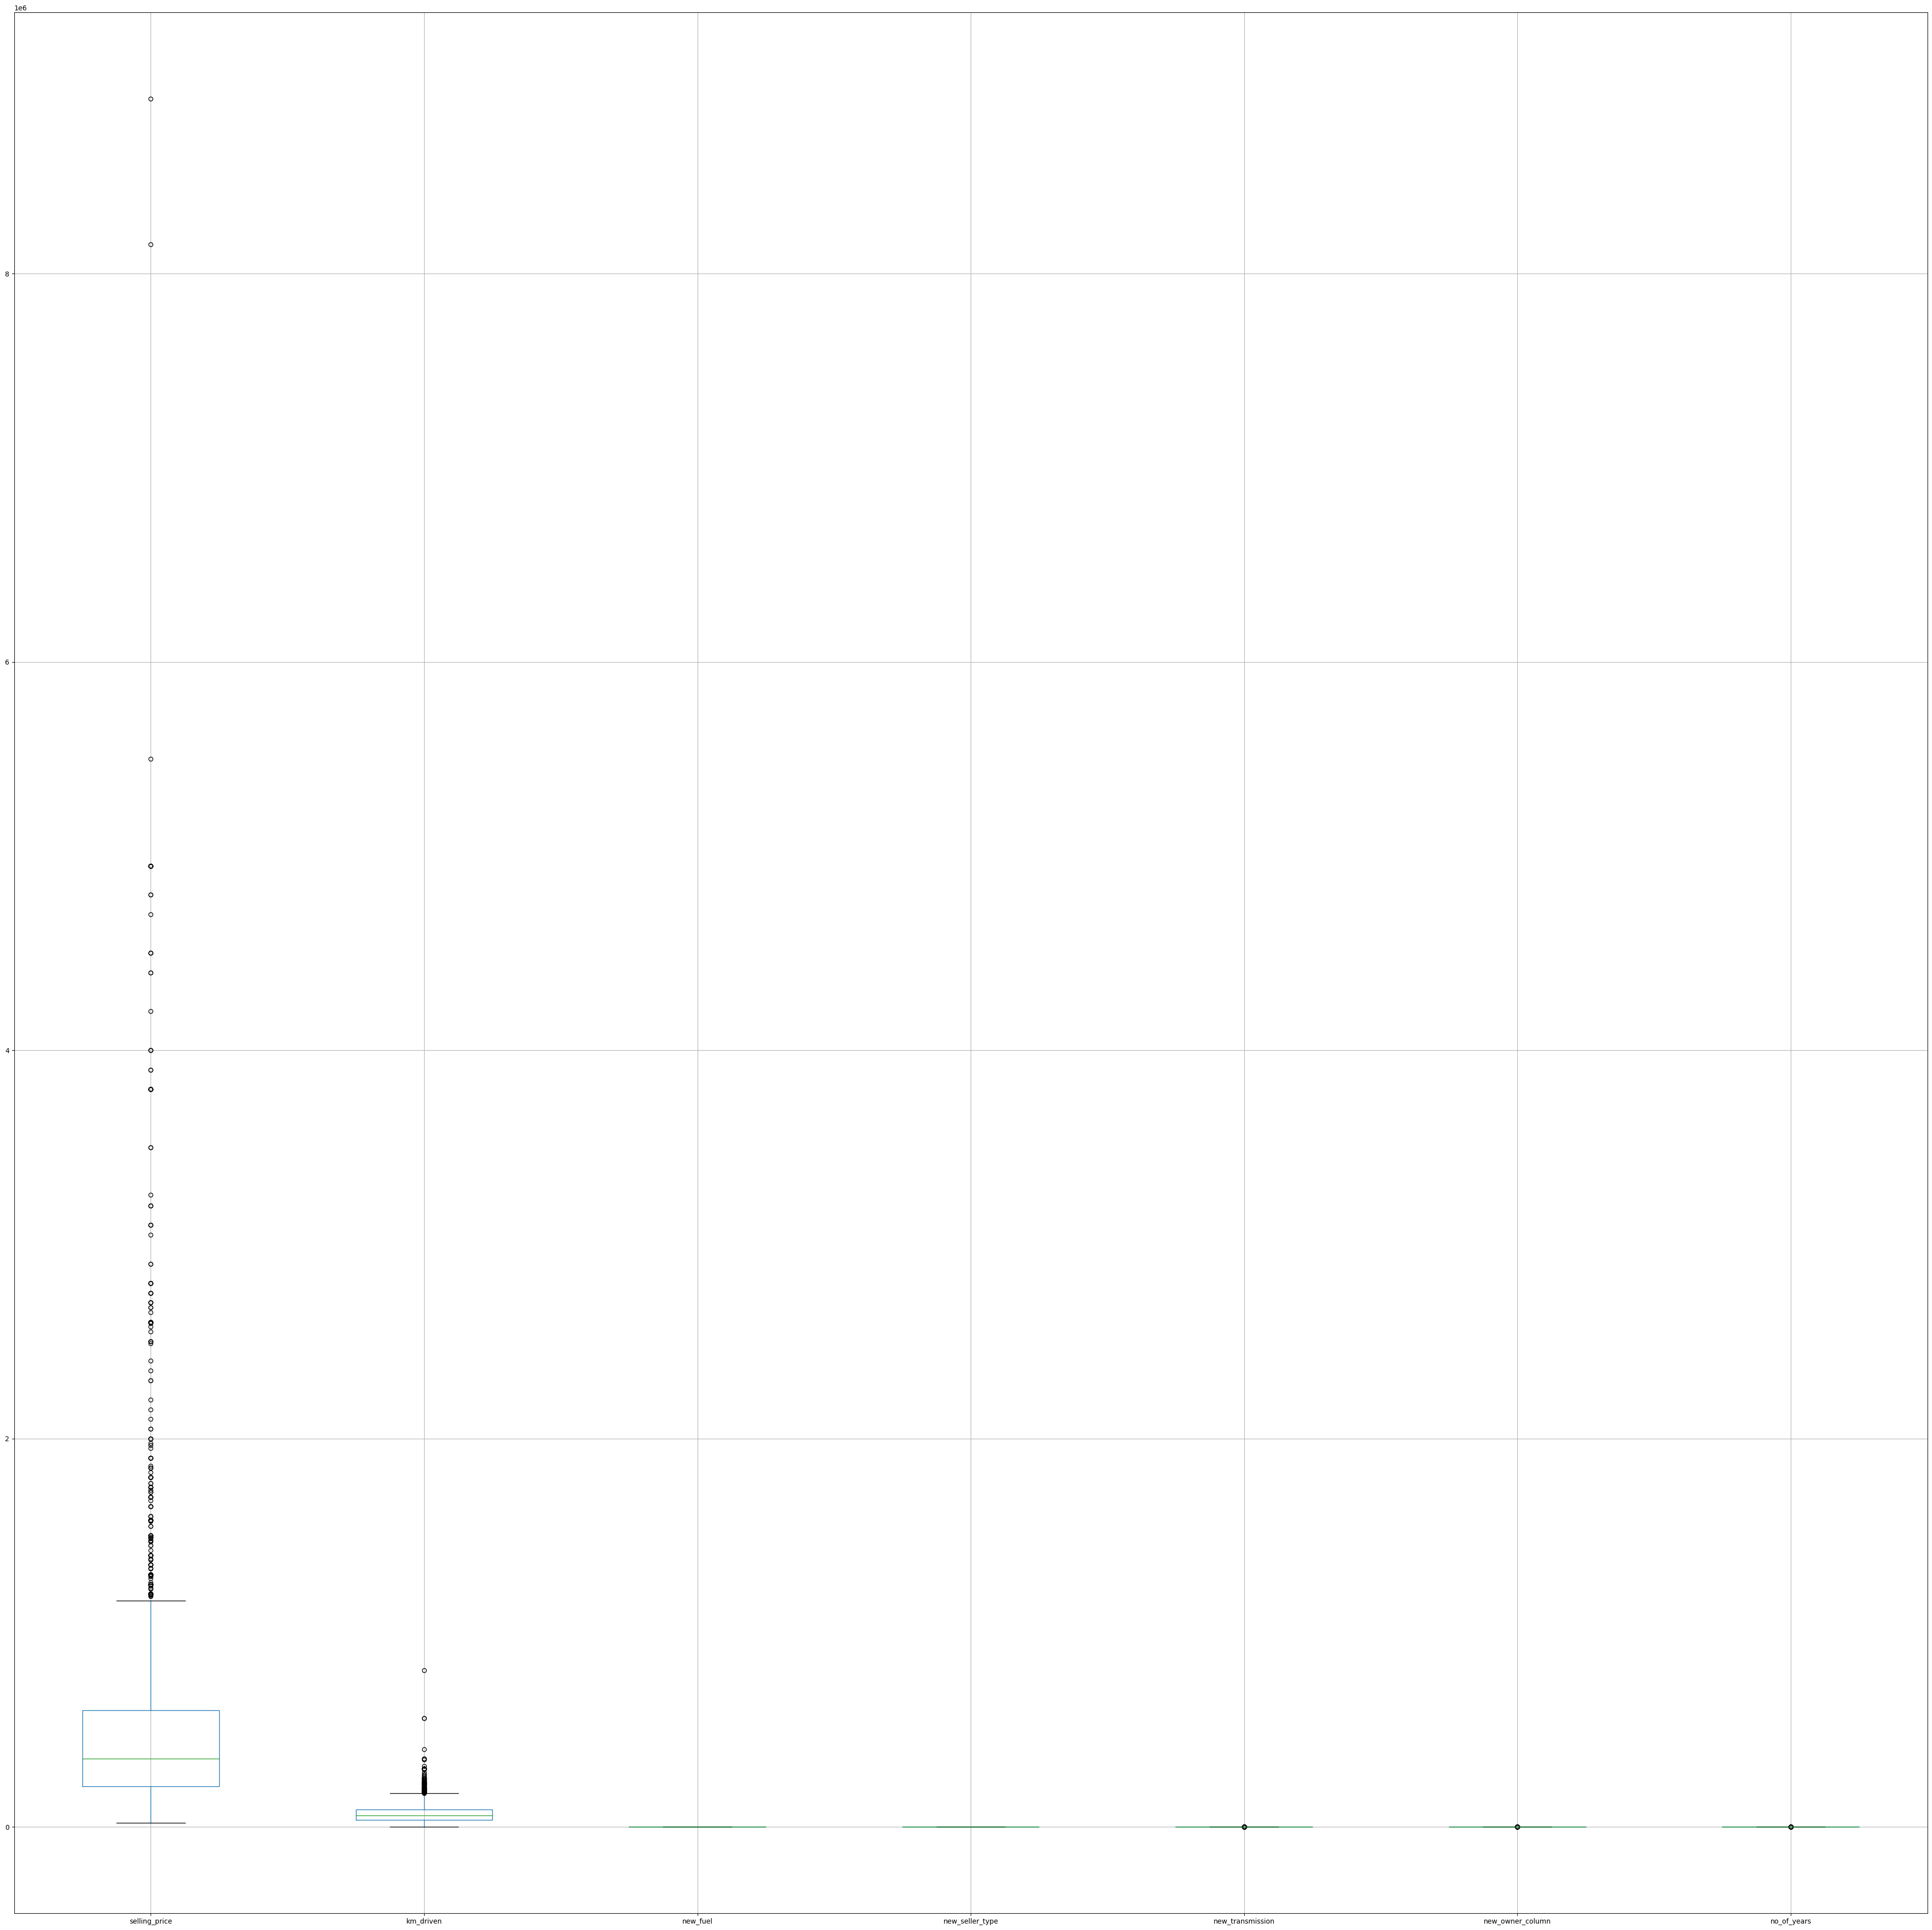

In [ ]:
plt.figure(figsize=(50,50))
newdf.boxplot()

##Selecting the Features and Target

In [ ]:
X = np.array(newdf.drop('selling_price',axis=1))
y = np.array(newdf.selling_price)

##Spliting the Dataset as training and testing dataset

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

##Choosing the Model

In [ ]:
regressor = DecisionTreeRegressor()

##Training the Model

In [ ]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(x_test)

## Comparing the Actual values with Predicted values

In [ ]:
comp=pd.DataFrame({'Actual Value':y_test.reshape(-1),'Predicted Value':y_pred.reshape(-1)})

In [ ]:
comp.head()

,Actual Value,Predicted Value
0,280000,2.250000e+05
1,701000,6.771427e+05
2,345000,2.850000e+05
3,95000,8.250000e+04
4,1300000,1.300000e+06


#Plotting Graph for Actual and Predicted value

In [ ]:
# Option 1: Reshape into 1-dimensional array
y_test_reshaped = y_test.reshape(-1)

# Option 2: Reshape into 2-dimensional array with more than 6 rows
# y_test_reshaped = y_test.reshape(-1, 7)

plt.scatter(x_test, y_test_reshaped, color='red')
plt.scatter(x_test, y_pred, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual V/s Predicted')

NameError: name 'y_test' is not defined

In [ ]:
r2_score(y_test,y_pred)

0.22360492234596518